In [1]:
%load_ext rpy2.ipython

##LoF

In [195]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.lof.NOcombinedDataset.geneSetPRE.txt")


cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

Read 2604550 rows and 8 (of 8) columns from 0.121 GB file in 00:00:04
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [196]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 2604550       8
      V1  V2  V3  V4    V5  V6   V7       V8
1: 0.034 1.5 2.2 0.5 10000 0.3 2300 33578.02
2: 0.034 1.5 2.2 0.6 10000 0.3 2300 33483.91
3: 0.034 1.5 2.2 0.7 10000 0.3 2300 33390.58
4: 0.034 1.5 2.2 0.8 10000 0.3 2300 33297.96
5: 0.034 1.5 2.2 0.9 10000 0.3 2300 33206.26
6: 0.034 1.5 2.2 1.0 10000 0.3 2300 33115.77


In [197]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

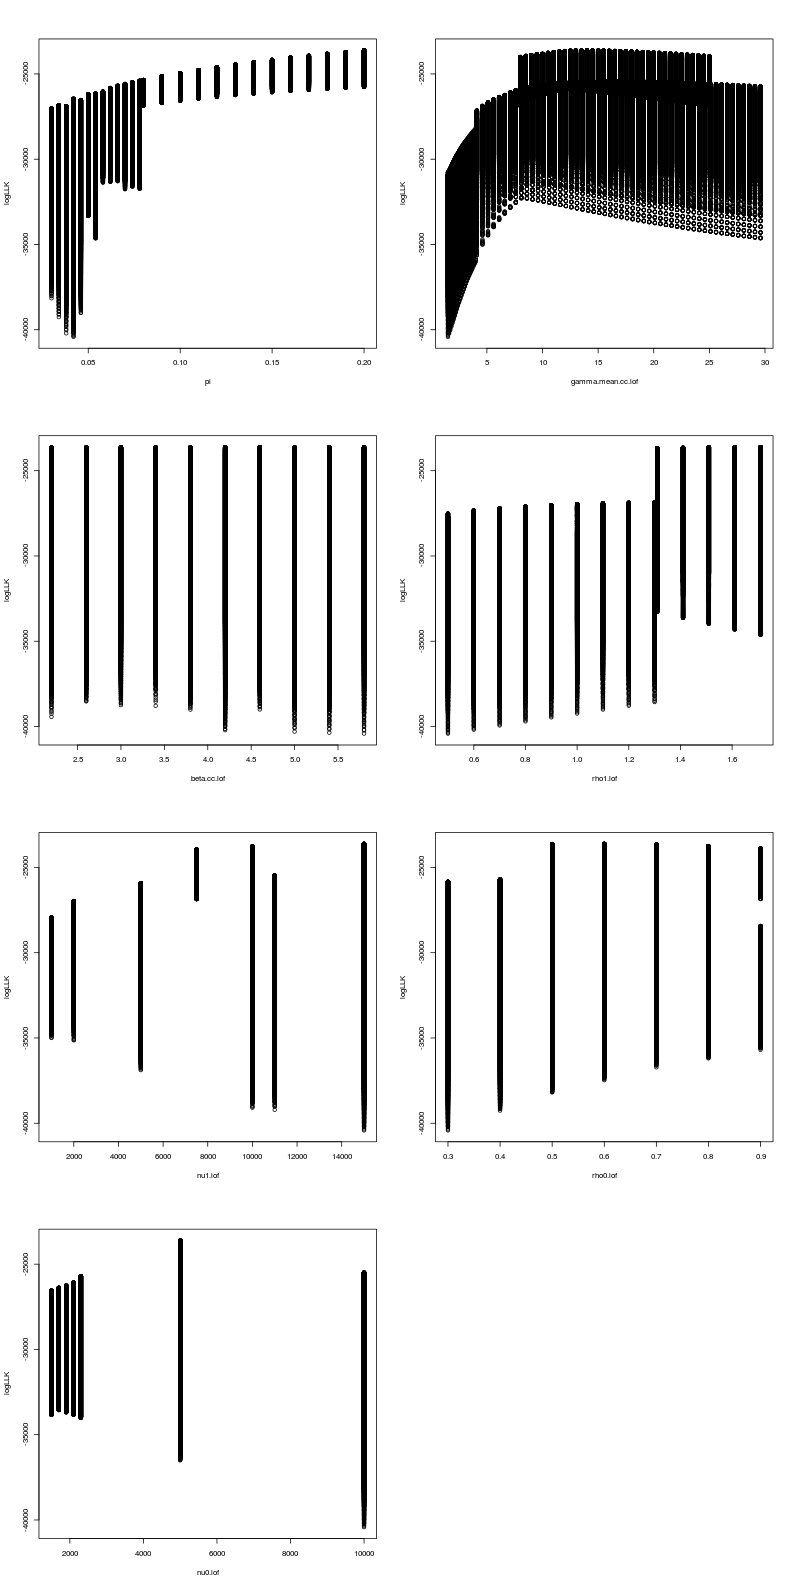

In [198]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

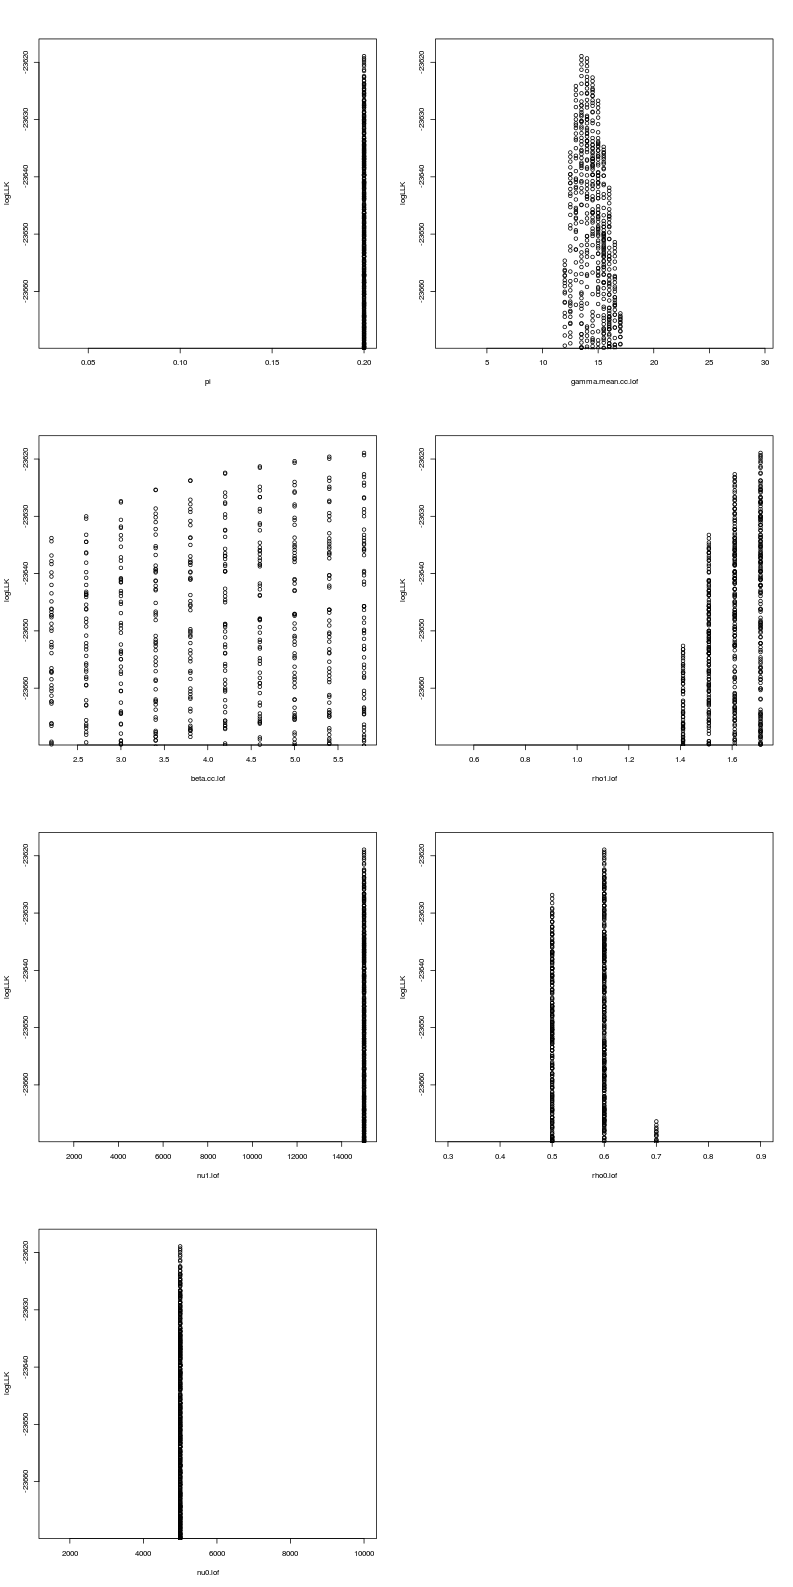

In [199]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 50
d.cc.lof.1 <- d.cc.lof[V6>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [200]:
%%R
d.cc.lof.1[order(V8)]

            V1   V2  V3   V4    V5  V6    V7       V8
      1: 0.200 13.5 5.8 1.71 15000 0.6  5000 23618.92
      2: 0.200 14.0 5.8 1.71 15000 0.6  5000 23619.31
      3: 0.200 13.5 5.4 1.71 15000 0.6  5000 23619.59
      4: 0.200 14.0 5.4 1.71 15000 0.6  5000 23619.93
      5: 0.200 13.5 5.0 1.71 15000 0.6  5000 23620.37
     ---                                             
2604546: 0.038  1.5 4.2 0.50 15000 0.3 10000 40208.07
2604547: 0.042  1.6 5.8 0.50 15000 0.3 10000 40218.94
2604548: 0.042  1.5 5.0 0.50 15000 0.3 10000 40295.68
2604549: 0.042  1.5 5.4 0.50 15000 0.3 10000 40358.44
2604550: 0.042  1.5 5.8 0.50 15000 0.3 10000 40413.94


###Set limit for the proportion of protective variants and the frequency of variants

In [201]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.017]

d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

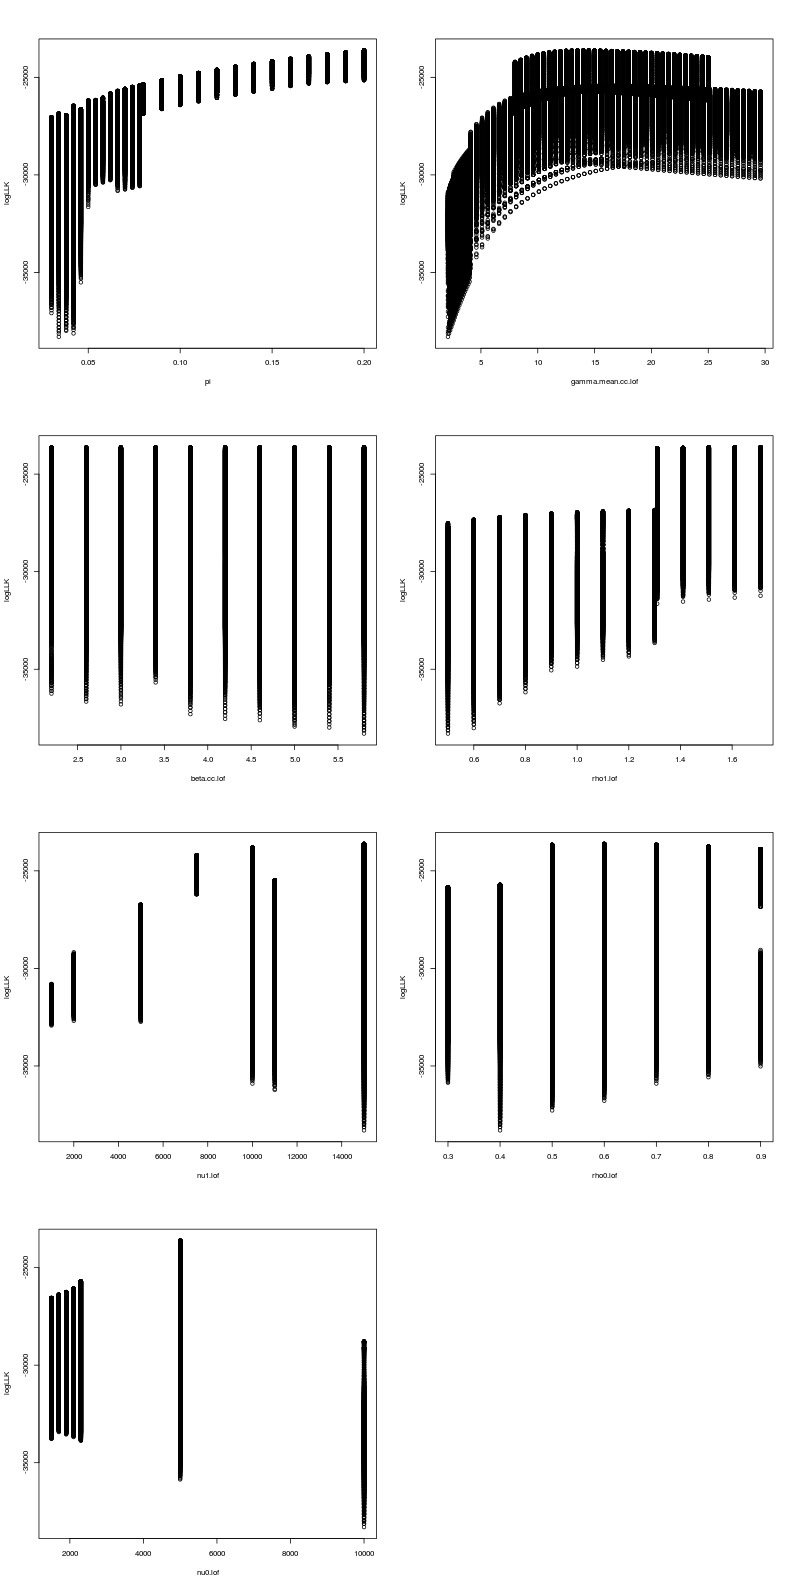

In [202]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

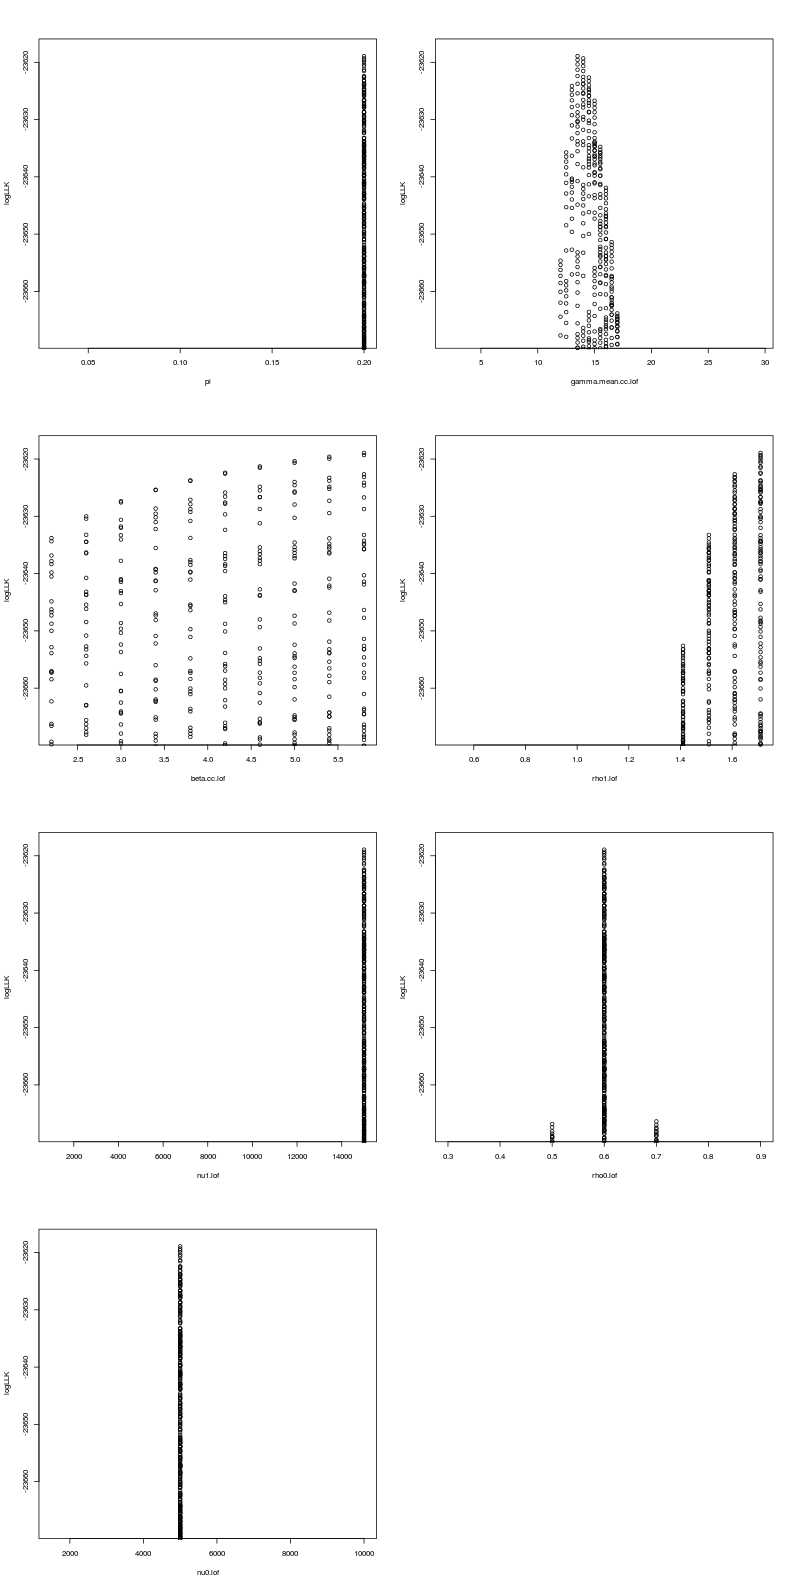

In [203]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 50
d.cc.lof.1 <- d.cc.lof.1[V8>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [204]:
%%R
head(d.cc.lof.1[order(V8)], 40)


     V1   V2  V3   V4    V5  V6   V7       V8
 1: 0.2 13.5 5.8 1.71 15000 0.6 5000 23618.92
 2: 0.2 14.0 5.8 1.71 15000 0.6 5000 23619.31
 3: 0.2 13.5 5.4 1.71 15000 0.6 5000 23619.59
 4: 0.2 14.0 5.4 1.71 15000 0.6 5000 23619.93
 5: 0.2 13.5 5.0 1.71 15000 0.6 5000 23620.37
 6: 0.2 14.0 5.0 1.71 15000 0.6 5000 23620.66
 7: 0.2 13.5 4.6 1.71 15000 0.6 5000 23621.29
 8: 0.2 14.0 4.6 1.71 15000 0.6 5000 23621.52
 9: 0.2 13.5 4.2 1.71 15000 0.6 5000 23622.39
10: 0.2 14.0 4.2 1.71 15000 0.6 5000 23622.54
11: 0.2 14.5 5.8 1.61 15000 0.6 5000 23622.65
12: 0.2 14.0 5.8 1.61 15000 0.6 5000 23623.13
13: 0.2 14.5 5.4 1.61 15000 0.6 5000 23623.27
14: 0.2 13.5 3.8 1.71 15000 0.6 5000 23623.74
15: 0.2 14.0 5.4 1.61 15000 0.6 5000 23623.79
16: 0.2 14.0 3.8 1.71 15000 0.6 5000 23623.79
17: 0.2 14.5 5.0 1.61 15000 0.6 5000 23623.99
18: 0.2 13.0 5.8 1.71 15000 0.6 5000 23624.14
19: 0.2 14.0 5.0 1.61 15000 0.6 5000 23624.56
20: 0.2 14.5 5.8 1.71 15000 0.6 5000 23624.62
21: 0.2 14.5 4.6 1.61 15000 0.6 50

In [193]:
#!gist -p Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetPRE.ipynb

In [194]:
!gist -u https://gist.github.com/643779cf155bc21ad40c Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetPRE.ipynb

ExceptionPexpect: pty.fork() failed: [Errno 12] Cannot allocate memory

##MIS3

In [26]:
%%R
library("data.table")
d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.mis3.combinedDataset.txt")


cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V8 != "NA"]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


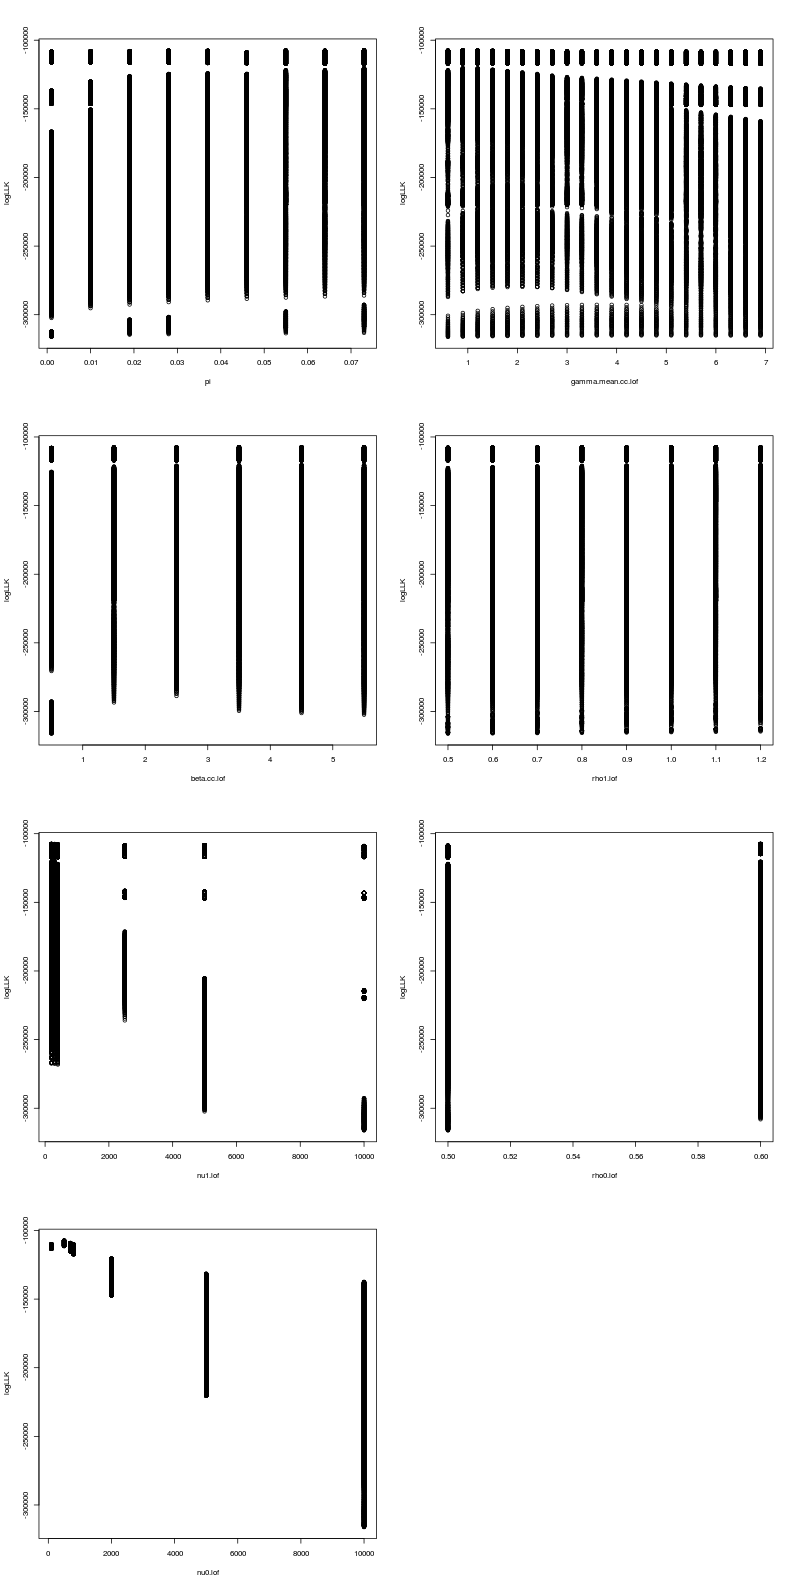

In [27]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK')
}

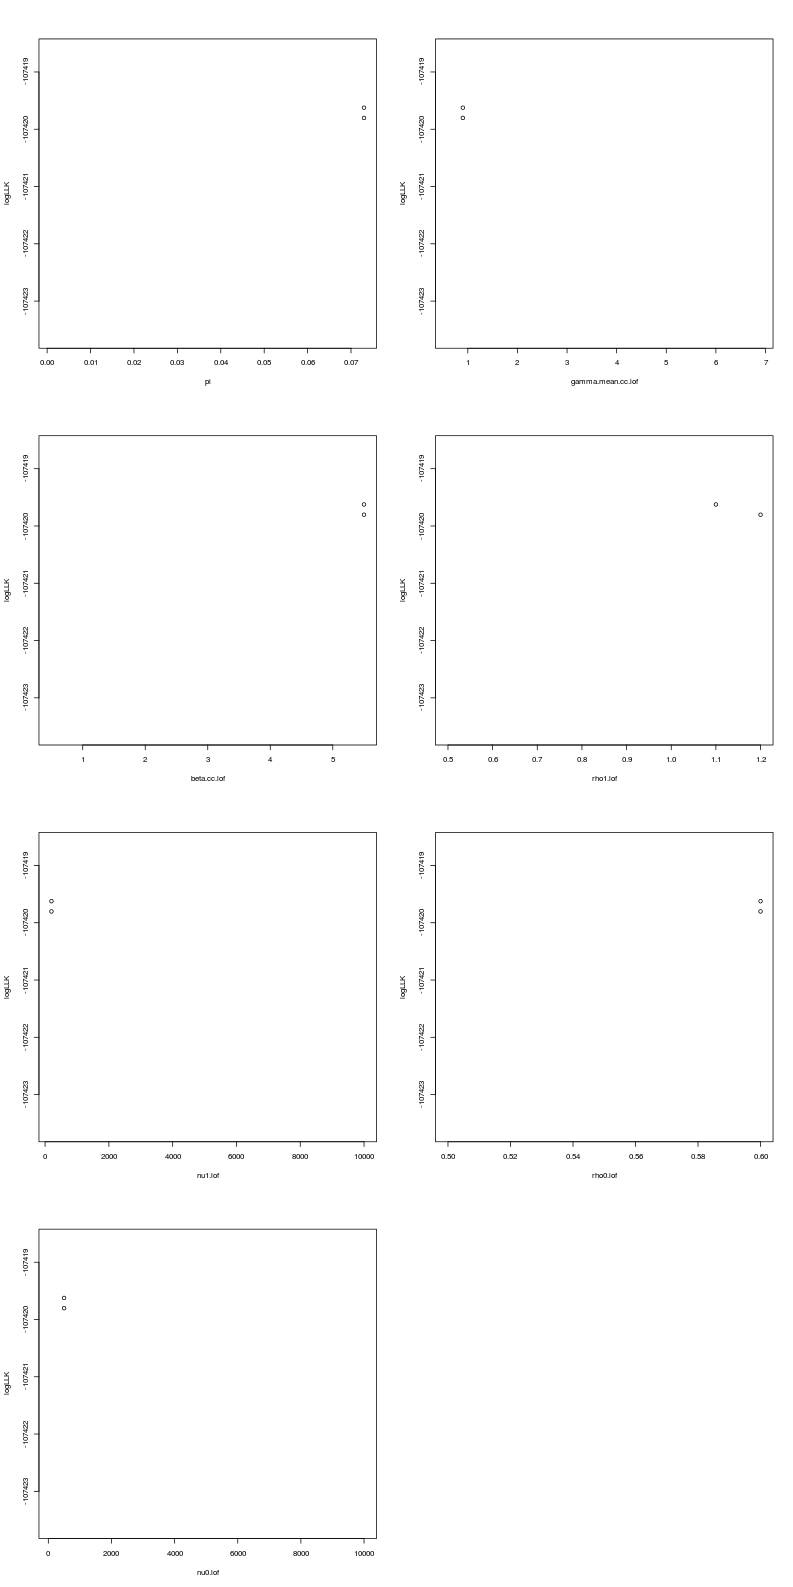

In [28]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [29]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

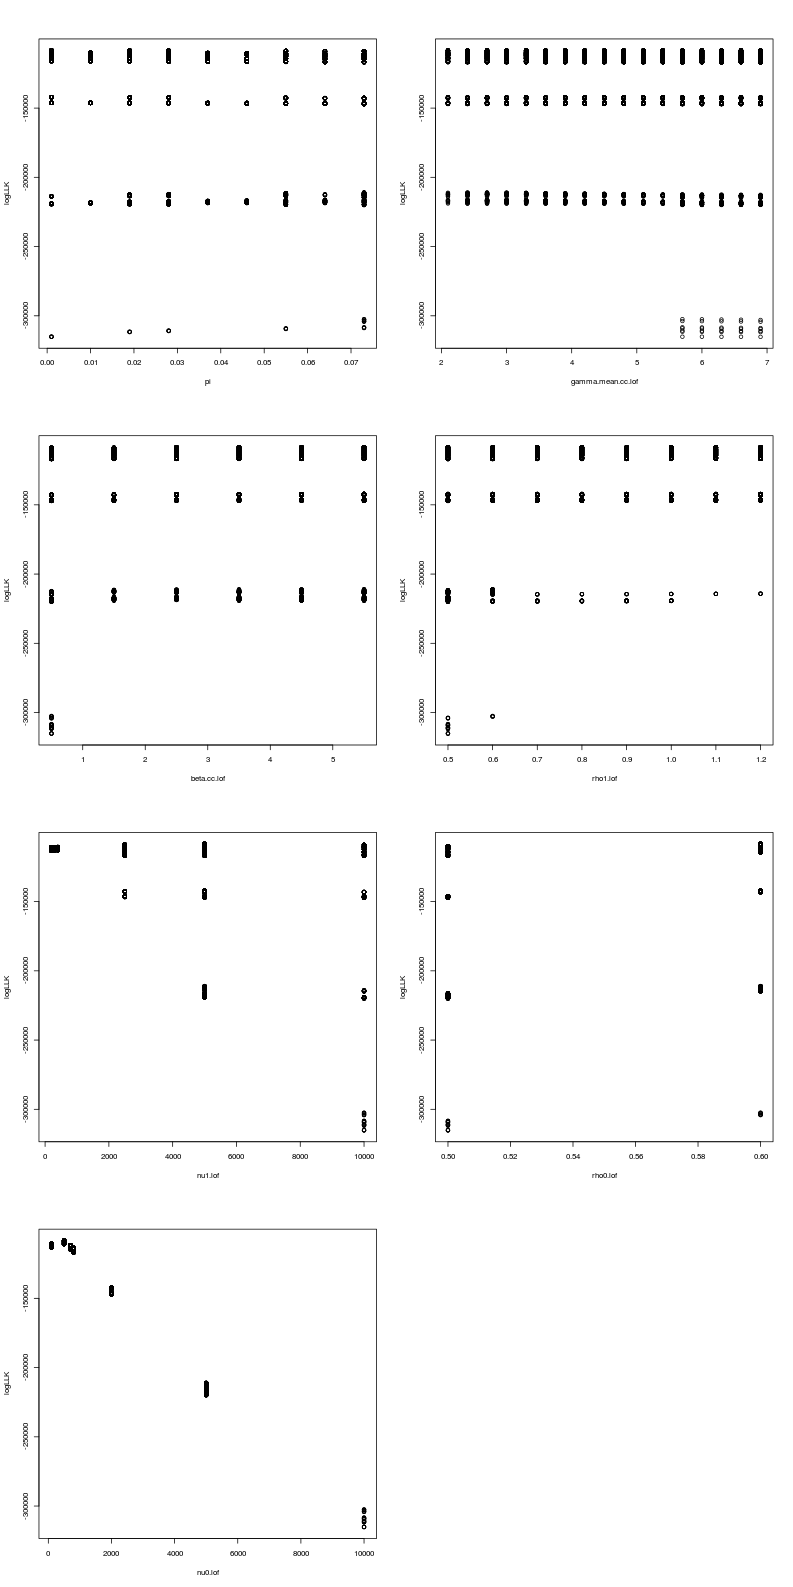

In [30]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

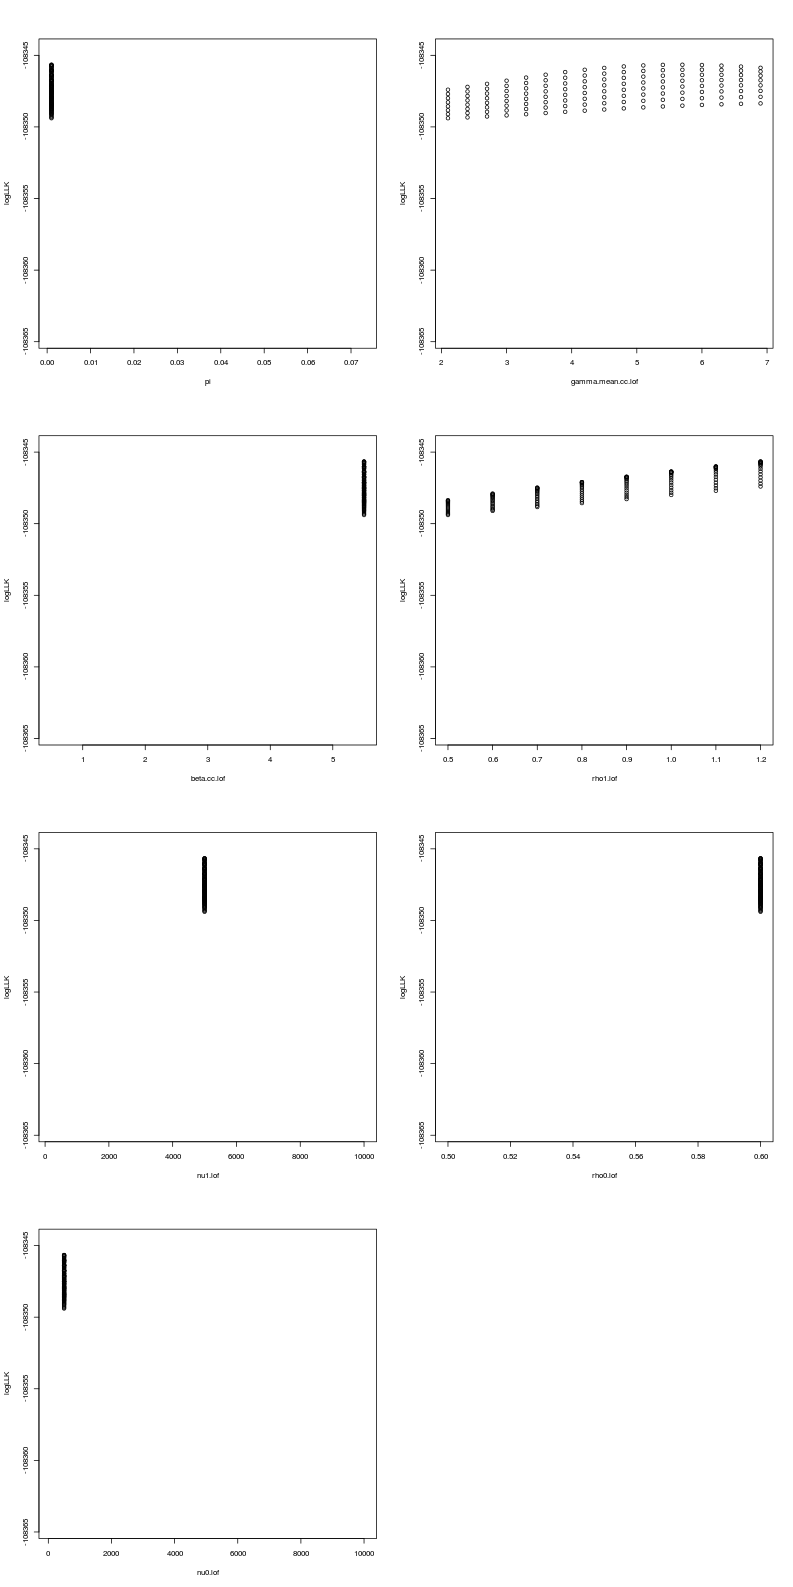

In [31]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 20

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [32]:
%%R
d.cc.mis3.1[V8>=lLimit]

          V1  V2  V3  V4    V5  V6   V7       V8
    1: 0.001 5.7 0.5 0.5 10000 0.5  100 110696.0
    2: 0.001 5.7 0.5 0.6 10000 0.5  100 110695.5
    3: 0.001 5.7 0.5 0.7 10000 0.5  100 110695.0
    4: 0.001 5.7 0.5 0.8 10000 0.5  100 110694.6
    5: 0.001 5.7 0.5 0.9 10000 0.5  100 110694.1
   ---                                          
63428: 0.073 6.9 5.5 0.8  5000 0.6 2000 142983.4
63429: 0.073 6.9 5.5 0.9  5000 0.6 2000 142961.3
63430: 0.073 6.9 5.5 1.0  5000 0.6 2000 142941.5
63431: 0.073 6.9 5.5 1.1  5000 0.6 2000 142923.6
63432: 0.073 6.9 5.5 1.2  5000 0.6 2000 142907.7
